In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Jesus CSV data.
CO_abs_dat = np.loadtxt("data\Jesus_data\Collection (160 scans) with CO in Ar at 0.CSV", delimiter=',')
CO_ref_dat = np.loadtxt('data\Jesus_data\Reference after 3 more cycles.CSV', delimiter=',')


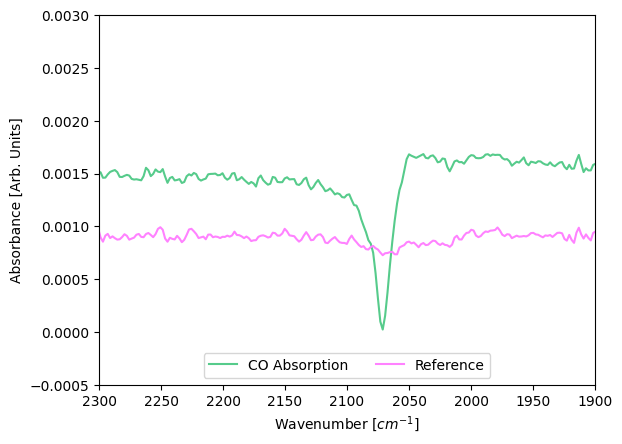

In [5]:
fig, ax = plt.subplots()
ax.plot(CO_abs_dat[:,0], CO_abs_dat[:,1], color='#56cb8b', label='CO Absorption')
ax.plot(CO_ref_dat[:,0], CO_ref_dat[:,1], color='#ff82ff', label='Reference')
plt.xlim([1900, 2300])
plt.gca().invert_xaxis()
plt.ylim([-0.0005, 0.003])
plt.xlabel("Wavenumber [$cm^{-1}$]")
plt.ylabel("Absorbance [Arb. Units]")
ax.legend(loc='lower center', ncols=2)
plt.show()